# Computer Vision Assignment 

Problems attempted :
- Installing OpenCV :P
- Converting Video into individual frames
- Converting frames into video
- Capturing video from webcam
- Chroma Keying
- Face Detection

In [2]:
## Import Libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

### Converting Video into individual frames

We start with writing a function to get a frame from the video specified in the file path, then storing it into a folder specified in the code.

In [3]:
video = "./GeoVision VD8700 Face Recognition IP Camera Demo Video.mp4"

cap = cv2.VideoCapture(video)

if not cap.isOpened():
    print("Error opening video stream or file")


def get_frame(sec):
    """
    Gets a frame from the video at a given second
    :param sec: second to get frame from
    :return: frame at given second
    """
    cap.set(cv2.CAP_PROP_POS_MSEC, sec * 1000)      # just cue to 20 sec. position
    hasFrames, image = cap.read()       
    if hasFrames:
        cv2.imwrite("images/frame" + str(sec) + ".jpg", image)                   # Common images folder for all images
    return hasFrames



sec = 0
frameRate = 0.5  # //it will capture image in each 0.5 second
count = 1

success = get_frame(sec)

while success:  # Breaks when there are no more frames , compact way of writing while True
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = get_frame(sec)

cap.release()


We read these images from the folder and now display them in two ways - OpenCV and Matplotlib.

In [ ]:
# Read images from images folder
images = []

frames = 0

for filename in os.listdir("images"):
    if frames == 100:
        break
    frames += 1
    img = cv2.imread(os.path.join("images", filename))
    if img is not None:
        images.append(img)
        # print(filename + " read")
        print("Image " + str(frames) + " read")




In [5]:
# Display images OpenCV way
# cv2.imshow("Image", images[0])
# cv2.waitKey(0)
# cv2.destroyAllWindows()

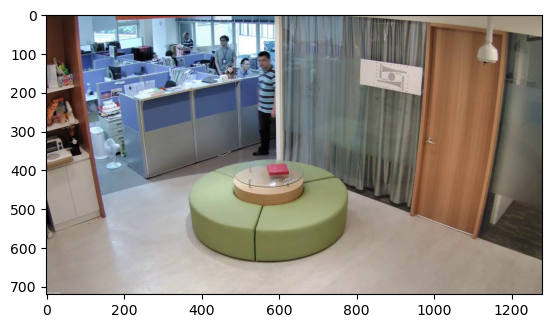

In [6]:
## Using matplotlib

for i in range(len(images)):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)      # Convert to RGB for matplotlib

plt.imshow(images[0])
plt.show()


### Merge the frames into a video

In [7]:
for i in range(len(images)):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_RGB2BGR)      # Convert to RGB for matplotlib

In [8]:
# Merge images into a video

height, width, layers = images[0].shape
size = (width, height)

out = cv2.VideoWriter('project.mp4', cv2.VideoWriter_fourcc(*'MP4V'), 20.0, size)

for i in range(len(images)):
    out.write(images[i])

out.release()

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


The Only Challenge I really faced was to merge the frames back into a video in mp4 format,which I was able to solve using the documentation of OpenCV.

### Capturing Video from Webcam and saving it

My Laptop does not have an Internal Webcam, so I used my Logitech C270 Webcam to capture the video and save it into a file.

In [ ]:
## I don't have an in built webcam, so I will be using an external webcam - a Logitech C270

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error opening video stream or file")

frames = []
sec = 0

while True:
    ret, frame = cap.read()
    if ret:
        sec += 1
        frames.append(frame)
        print("Frame " + str(sec) + " read")
        cv2.imshow("Frame", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()

cv2.destroyAllWindows()


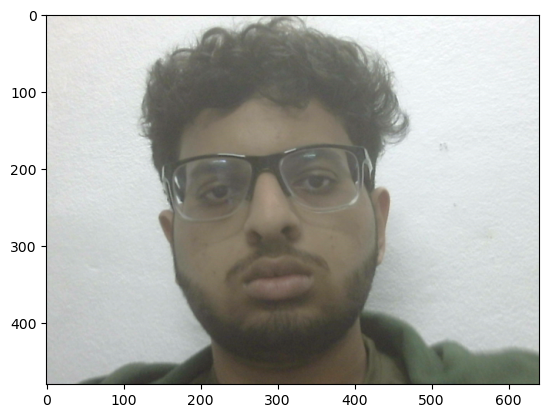

In [10]:
for i in range(len(frames)):
    frames[i] = cv2.cvtColor(frames[i], cv2.COLOR_BGR2RGB)      # Convert to RGB for matplotlib

plt.imshow(frames[12])

In [11]:
### Save frames in folder ./video_capture

for i in range(len(frames)):
    cv2.imwrite("./video_capture/frame" + str(i) + ".jpg", frames[i])

### Merge frames into a video

height, width, layers = frames[0].shape

size = (width, height)

out = cv2.VideoWriter('video_capture.mp4', cv2.VideoWriter_fourcc(*'MP4V'), 20.0, size)

for i in range(len(frames)):
    out.write(frames[i])

out.release()


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


### Chroma Keying - Merging two videos into one

- We Do this by using the concept of masking, where we mask the green screen and replace it with the background video.
- We use the cv2.inRange function to mask the green screen, and get good results.



In [12]:
def chroma_key_frame(fg,bg):
    """
    Replaces the background of a frame with a background image
    :param fg: foreground image
    :param bg: background image
    :return: frame with background replaced
    """
    fg = cv2.cvtColor(fg, cv2.COLOR_BGR2RGB)
    bg = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)

    fg = cv2.resize(fg, (bg.shape[1], bg.shape[0]))

    mask = np.zeros(fg.shape, dtype=np.uint8)

    lower_color = np.array([0,30,0])
    upper_color = np.array([75,255,75])
    
    mask = cv2.inRange(fg, lower_color, upper_color)

    # plt.imshow(mask, cmap="gray")

    masked_image = np.copy(fg)
    masked_image[mask != 0] = [0, 0, 0]
    bg_new = np.copy(bg)
    bg_new[mask == 0] = [0, 0, 0]

    return masked_image + bg_new


In [ ]:
## Read video
green_screen_video = "./greenscreen.mp4"
wildlife_video = "./wildlife.mp4"

cap = cv2.VideoCapture(green_screen_video)

if not cap.isOpened():
    print("Error opening video stream or file")

frames_green = []
sec = 0

while True:
    ret, frame = cap.read()
    if ret:
        sec += 1
        frames_green.append(frame)
        print("Frame " + str(sec) + " read")
        cv2.imshow("Frame", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()

cv2.destroyAllWindows()


In [ ]:
cap = cv2.VideoCapture(wildlife_video)

if not cap.isOpened():
    print("Error opening video stream or file")

frames_wildlife = []

sec = 0

while True:
    ret, frame = cap.read()
    if ret:
        sec += 1
        frames_wildlife.append(frame)
        print("Frame " + str(sec) + " read")
        cv2.imshow("Frame", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()

cv2.destroyAllWindows()

In [15]:
# Remove extra frames from wildlife video
frames_wildlife = frames_wildlife[:len(frames_green)]

# Chroma keying
chroma_keyed_frames = []

for i in range(len(frames_green)):
    chroma_keyed_frames.append(chroma_key_frame(frames_green[i],frames_wildlife[i]))
    chroma_keyed_frames[i] = cv2.cvtColor(chroma_keyed_frames[i], cv2.COLOR_RGB2BGR)      # Convert to RGB for matplotlib



In [16]:
## Merge frames into a video

height, width, layers = chroma_keyed_frames[0].shape

size = (width, height)

out = cv2.VideoWriter('chroma_keyed.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 20.0, size)

for i in range(len(chroma_keyed_frames)):
    out.write(chroma_keyed_frames[i])


out.release()



### Face Detection and Tracking

- Face detection using Haar Cascades
- We use the Haar Cascade for face detection , and then merge franes with bounding boxes on them to create a video.

In [ ]:
#  Read Images from /images folder

images = []

for filename in os.listdir("images"):
    img = cv2.imread(os.path.join("images", filename))
    if img is not None:
        images.append(img)
        print(filename + " read")

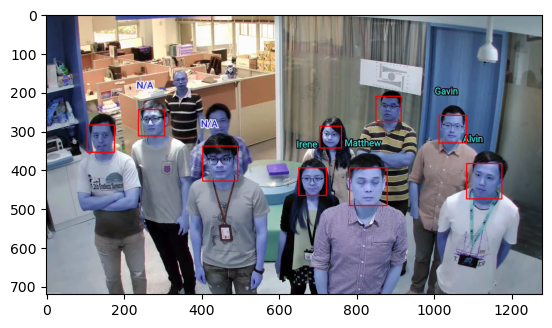

In [18]:
# Apply facial detection
# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Read the input image
img = images[55]
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 9)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)

# Display the output with faces detected
plt.imshow(img)
plt.show()

In [19]:
## Apply facial detection to all images
faces = []

for i in range(len(images)):
    img = images[i]
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces.append(face_cascade.detectMultiScale(gray, 1.1, 9))

# Create Video with faces detected
    
for i in range(len(images)):
    for (x, y, w, h) in faces[i]:
        cv2.rectangle(images[i], (x,y), (x+w, y+h), (255, 0, 0), 2)
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)      # Convert to RGB for matplotlib


height, width, layers = images[0].shape

size = (width, height)

out = cv2.VideoWriter('faces_detected.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 20.0, size)

for i in range(len(images)):
    out.write(images[i])

out.release()

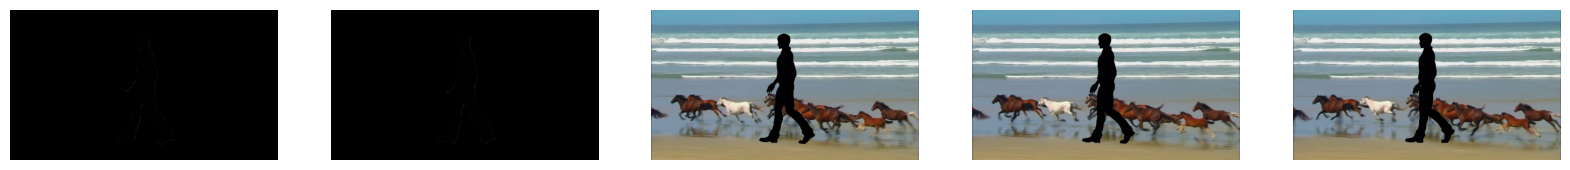

In [20]:
## Store First Five frames of chroma keyed video

frames = []

for i in range(5):
    frames.append(chroma_keyed_frames[i])
    frames[i] = cv2.cvtColor(frames[i], cv2.COLOR_BGR2RGB)      # Convert to RGB for matplotlib

# Display frames in subplots
fig, axs = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
    axs[i].imshow(frames[i])
    axs[i].axis('off')
plt.show()

